In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

In [3]:

heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
# print(heart_disease.metadata)

# variable information
# print(heart_disease.variables)


In [4]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np

heart_disease = fetch_ucirepo(id=45)


X = heart_disease.data.features
y = heart_disease.data.targets

dataset = pd.concat([X, y], axis=1)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
dataset = dataset.replace({'num':{2:1, 3:1, 4:1}})

In [7]:
# Check for non-integer values
non_integer_values = X.apply(pd.to_numeric, errors='coerce').isnull()

# Filter rows with non-integer values
rows_with_non_integer = X[non_integer_values.any(axis=1)]

print("Rows with non-integer values:")
print(rows_with_non_integer)

Rows with non-integer values:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
87    53    0   3       128   216    0        2      115      0      0.0   
166   52    1   3       138   223    0        0      169      0      0.0   
192   43    1   4       132   247    1        2      143      1      0.1   
266   52    1   4       128   204    1        0      156      1      1.0   
287   58    1   2       125   220    0        0      144      0      0.4   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
87       1  0.0   NaN  
166      1  NaN   3.0  
192      2  NaN   7.0  
266      2  0.0   NaN  
287      2  NaN   7.0  
302      1  NaN   3.0  


In [8]:
# Impute missing 'ca' values with the mode (most frequent value)
X['ca'] = X['ca'].fillna(X['ca'].mode()[0])

# Impute missing 'thal' values with the mode (most frequent value)
X['thal'] = X['thal'].fillna(X['thal'].mode()[0])

print("DataFrame after imputation:")
print(X)

DataFrame after imputation:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2 

C:\Users\manas\AppData\Local\Temp\ipykernel_51664\3547782548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'] = X['ca'].fillna(X['ca'].mode()[0])
C:\Users\manas\AppData\Local\Temp\ipykernel_51664\3547782548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['thal'] = X['thal'].fillna(X['thal'].mode()[0])


In [9]:
# Check for non-integer values
non_integer_values = X.apply(pd.to_numeric, errors='coerce').isnull()

# Filter rows with non-integer values
rows_with_non_integer = X[non_integer_values.any(axis=1)]

print("Rows with non-integer values:")
print(rows_with_non_integer)

Rows with non-integer values:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
Index: []


In [10]:
y = y.replace({'num':{2:1, 3:1, 4:1}})

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

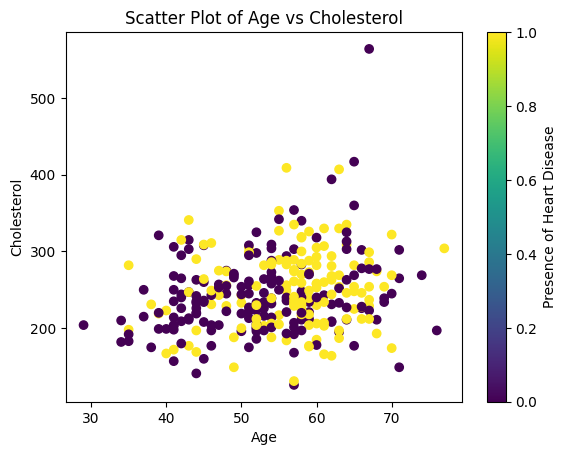

In [12]:
import matplotlib.pyplot as plt

# Example: Visualizing age and cholesterol
plt.scatter(X['age'], X['chol'], c=y['num'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot of Age vs Cholesterol')
plt.colorbar(label='Presence of Heart Disease')
plt.show()


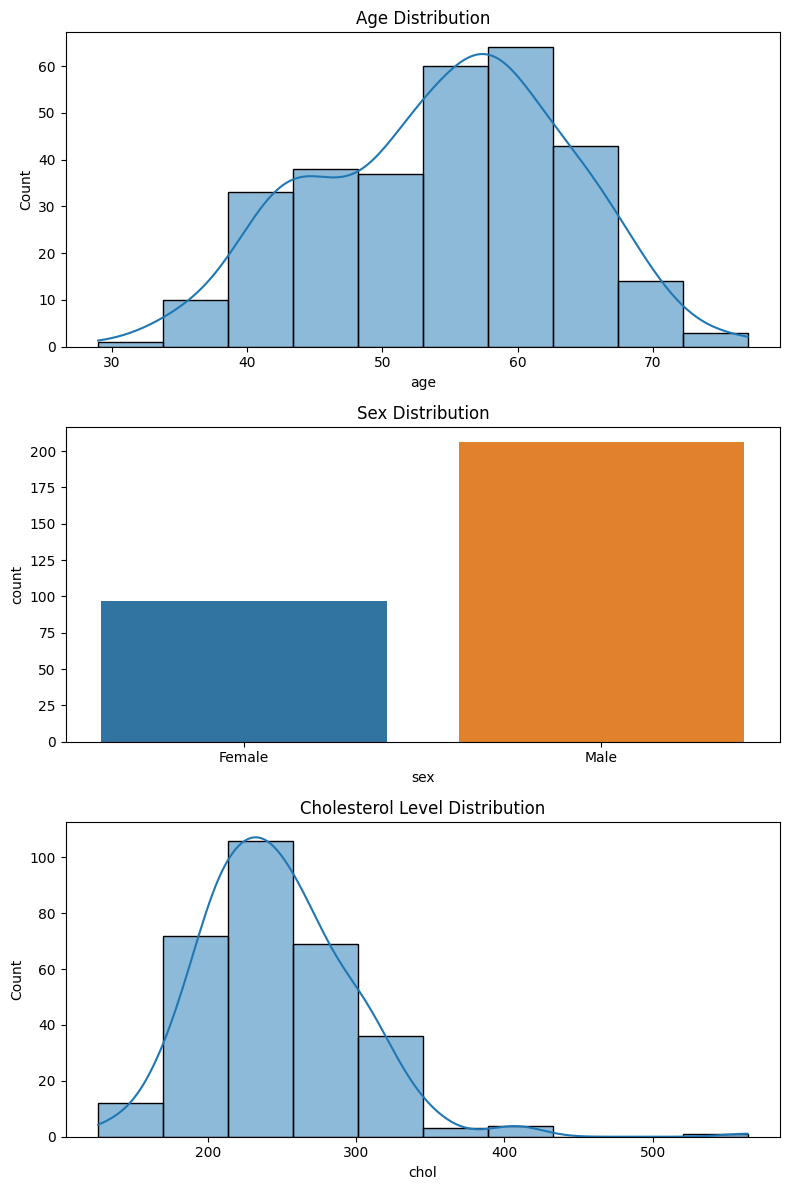

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Plot age distribution
sns.histplot(data=X, x='age', bins=10, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# Plot sex distribution
sns.countplot(data=X, x='sex', ax=axes[1])
axes[1].set_title('Sex Distribution')
axes[1].set_xticklabels(['Female', 'Male'])

# Plot cholesterol level distribution
sns.histplot(data=X, x='chol', bins=10, kde=True, ax=axes[2])
axes[2].set_title('Cholesterol Level Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


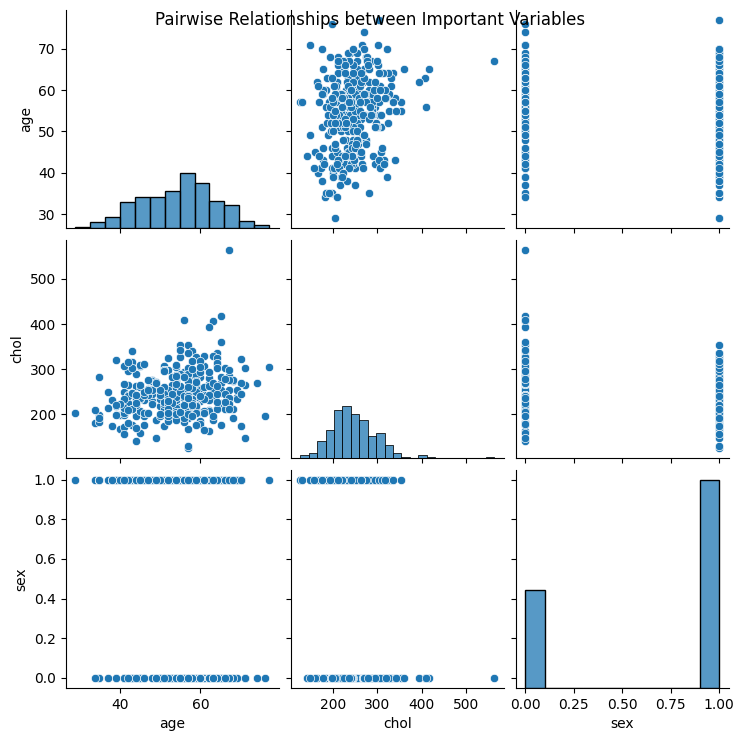

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

important_vars = ['age', 'chol','sex']

# Pairwise scatter plot matrix for important variables
sns.pairplot(X[important_vars])
plt.suptitle('Pairwise Relationships between Important Variables')
plt.show()

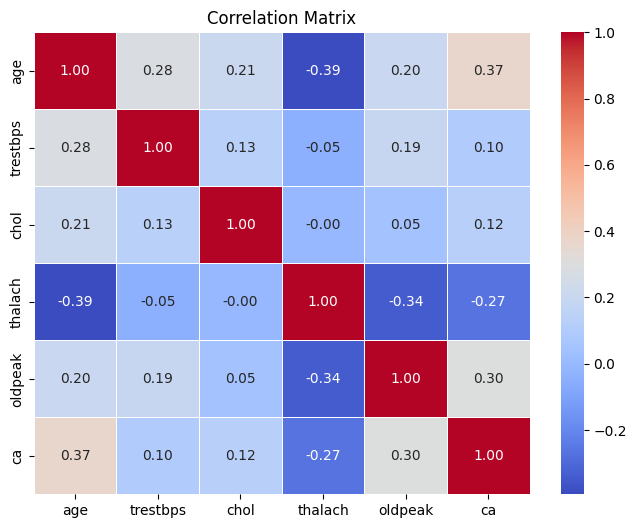

In [15]:
# Correlation matrix
corr_matrix = X[['age', "trestbps", "chol", "thalach", "oldpeak", "ca"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

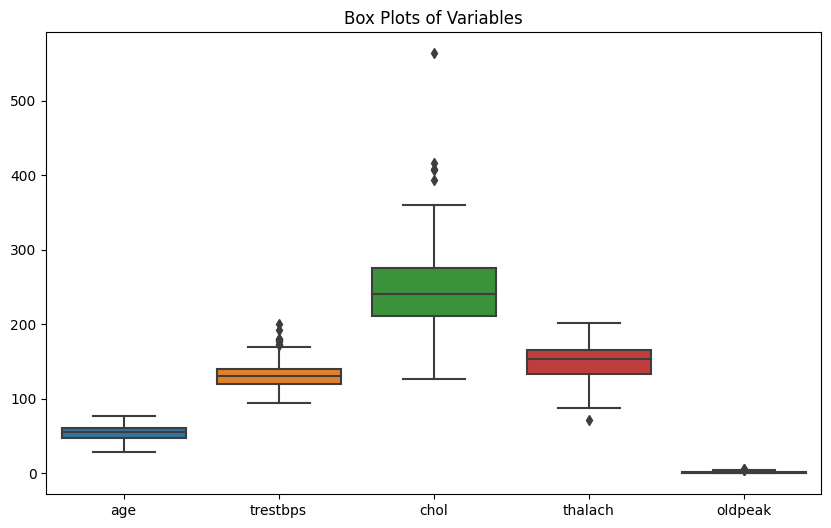

In [16]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=X[['age', "trestbps", "chol", "thalach", "oldpeak"]])
plt.title('Box Plots of Variables')
plt.show()

In [17]:
# X_without_outerliers = X.copy()
# for col in ["trestbps", "chol", "thalach", "oldpeak"]:
#   X_without_outerliers = replace_outliers(X_without_outerliers, col)

In [18]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
dataset['sex'] = dataset['sex'].replace({1: 'Male', 0: 'Female'})
dataset['num'] = dataset['num'].replace({1: 'Presence', 0: 'No Presence'})

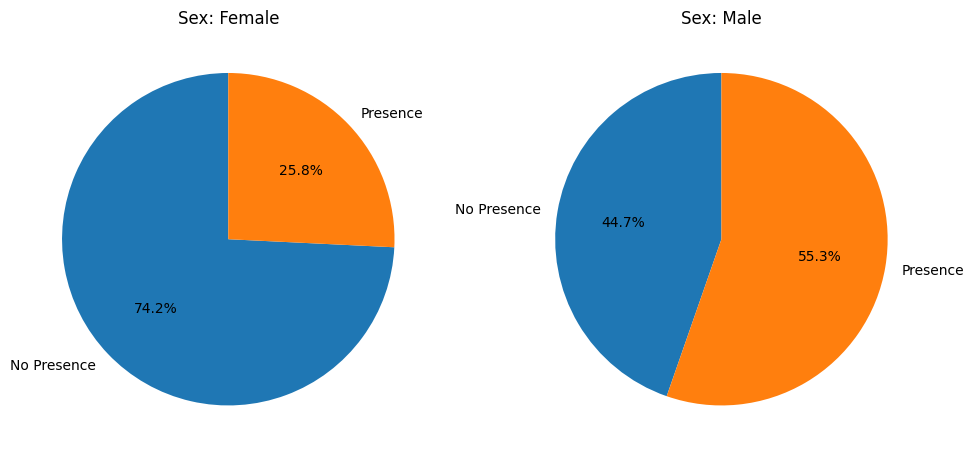

In [21]:
grouped = dataset.groupby('sex')['num'].value_counts(normalize=True).unstack(fill_value=0)

fig, axes = plt.subplots(1, grouped.shape[0], figsize=(10, 5))
for i, (sex, counts) in enumerate(grouped.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Sex: {sex}')

plt.tight_layout()
plt.show()

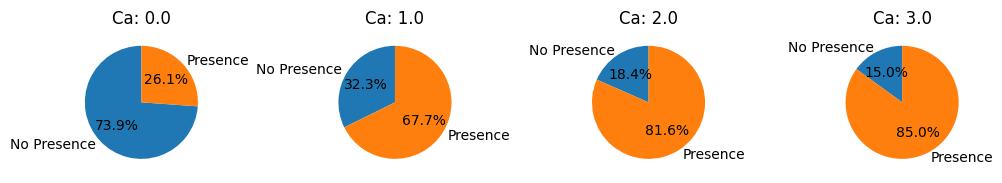

In [22]:
grouped = dataset.groupby('ca')['num'].value_counts(normalize=True).unstack(fill_value=0)

fig, axes = plt.subplots(1, grouped.shape[0], figsize=(10, 5))
for i, (ca, counts) in enumerate(grouped.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Ca: {ca}')

plt.tight_layout()
plt.show()

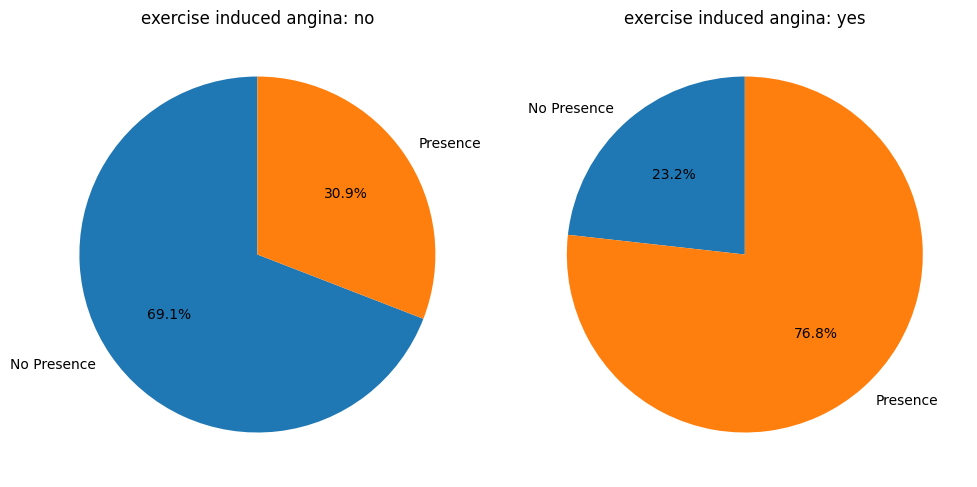

In [23]:
dataset['exang'] = dataset['exang'].replace({1: 'exercise induced angina: yes', 0: 'exercise induced angina: no'})
grouped = dataset.groupby('exang')['num'].value_counts(normalize=True).unstack(fill_value=0)

fig, axes = plt.subplots(1, grouped.shape[0], figsize=(10, 5))
for i, (exang, counts) in enumerate(grouped.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{exang}')

plt.tight_layout()
plt.show()

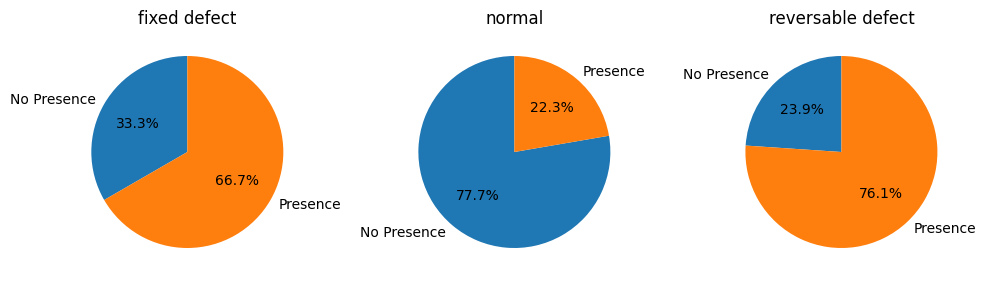

In [24]:
dataset['thal'] = dataset['thal'].replace({3: 'normal', 6: 'fixed defect', 7: "reversable defect"})
grouped = dataset.groupby('thal')['num'].value_counts(normalize=True).unstack(fill_value=0)

fig, axes = plt.subplots(1, grouped.shape[0], figsize=(10, 5))
for i, (thal, counts) in enumerate(grouped.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{thal}')

plt.tight_layout()
plt.show()

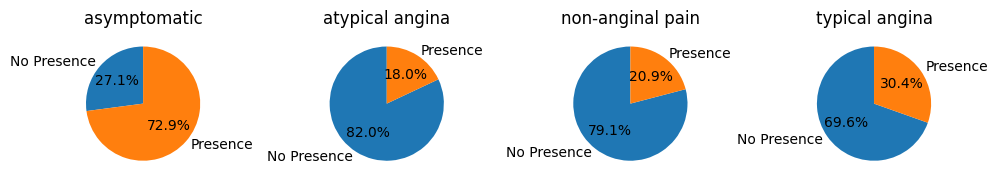

In [25]:
dataset['cp'] = dataset['cp'].replace({1: 'typical angina', 2: 'atypical angina', 3: "non-anginal pain", 4: "asymptomatic"})
grouped = dataset.groupby('cp')['num'].value_counts(normalize=True).unstack(fill_value=0)

fig, axes = plt.subplots(1, grouped.shape[0], figsize=(10, 5))
for i, (cp, counts) in enumerate(grouped.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{cp}')

plt.tight_layout()
plt.show()

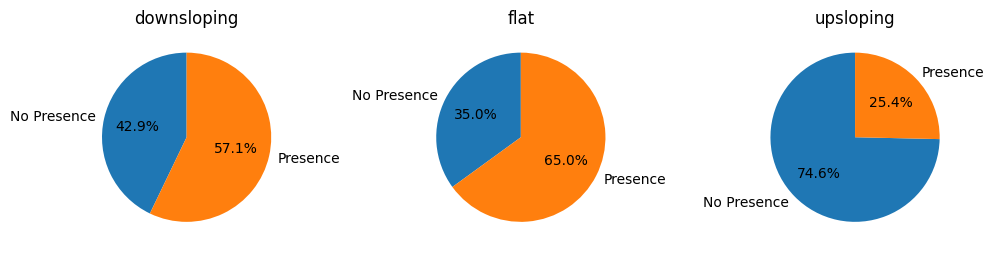

In [26]:
dataset['slope'] = dataset['slope'].replace({1: 'upsloping', 2: 'flat', 3: "downsloping"})
grouped = dataset.groupby('slope')['num'].value_counts(normalize=True).unstack(fill_value=0)

fig, axes = plt.subplots(1, grouped.shape[0], figsize=(10, 5))
for i, (slope, counts) in enumerate(grouped.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{slope}')

plt.tight_layout()
plt.show()

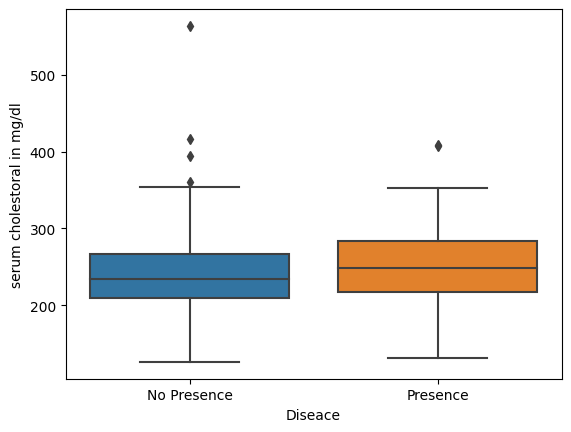

In [27]:
sns.boxplot(x='num', y='chol', data=dataset)
plt.xlabel('Diseace')
plt.ylabel('serum cholestoral in mg/dl')
plt.show()

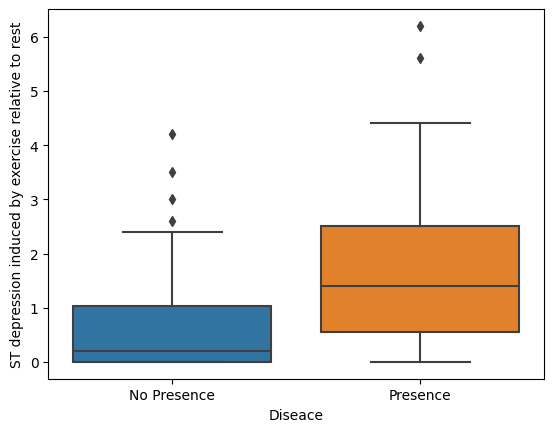

In [28]:
sns.boxplot(x='num', y='oldpeak', data=dataset)
plt.xlabel('Diseace')
plt.ylabel('ST depression induced by exercise relative to rest')
plt.show()

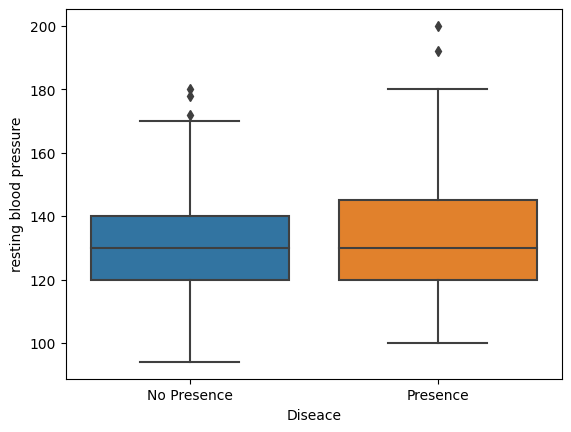

In [29]:
sns.boxplot(x='num', y='trestbps', data=dataset)
plt.xlabel('Diseace')
plt.ylabel('resting blood pressure')
plt.show()

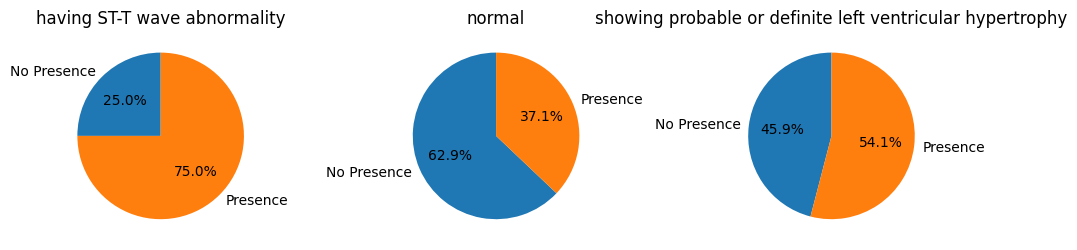

In [30]:
dataset['restecg'] = dataset['restecg'].replace({0: 'normal', 1: 'having ST-T wave abnormality', 2: "showing probable or definite left ventricular hypertrophy"})
grouped = dataset.groupby('restecg')['num'].value_counts(normalize=True).unstack(fill_value=0)

fig, axes = plt.subplots(1, grouped.shape[0], figsize=(10, 5))
for i, (restecg, counts) in enumerate(grouped.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{restecg}')

plt.tight_layout()
plt.show()

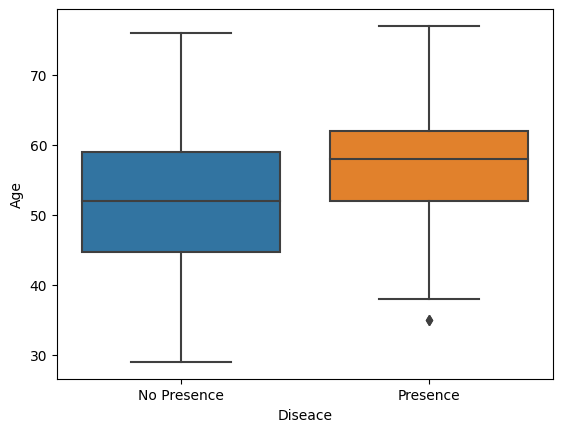

In [31]:
sns.boxplot(x='num', y='age', data=dataset)
plt.xlabel('Diseace')
plt.ylabel('Age')
plt.show()

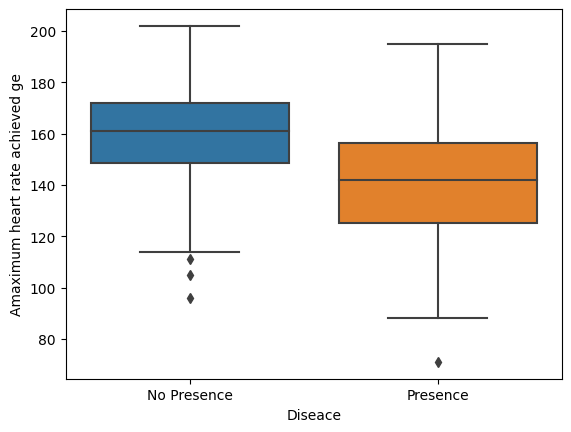

In [32]:
sns.boxplot(x='num', y='thalach', data=dataset)
plt.xlabel('Diseace')
plt.ylabel('Amaximum heart rate achieved ge')
plt.show()

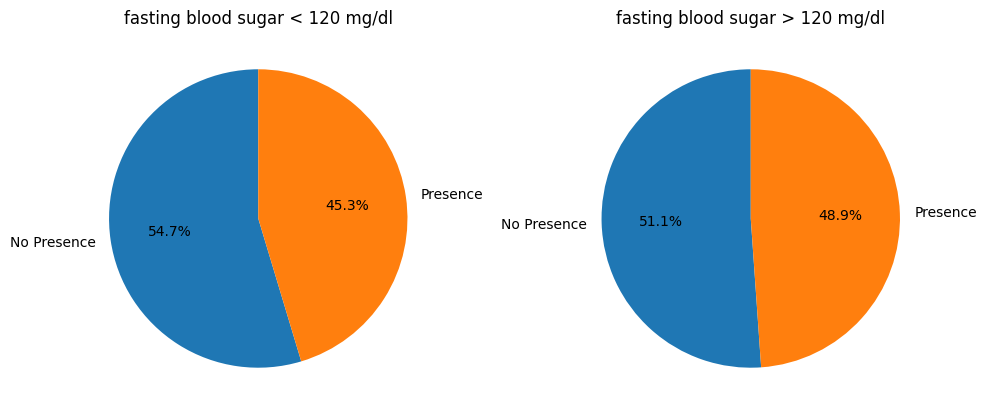

In [33]:
dataset['fbs'] = dataset['fbs'].replace({0: 'fasting blood sugar < 120 mg/dl', 1: 'fasting blood sugar > 120 mg/dl'})
grouped = dataset.groupby('fbs')['num'].value_counts(normalize=True).unstack(fill_value=0)

fig, axes = plt.subplots(1, grouped.shape[0], figsize=(10, 5))
for i, (fbs, counts) in enumerate(grouped.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{fbs}')

plt.tight_layout()
plt.show()

## Logestic Regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV

categorical_features = ['sex', 'exang', "fbs"]
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Accuracy: 0.8852459016393442


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8852459016393442


In [37]:
import pandas as pd

best_pipeline = grid_search.best_estimator_
logreg = best_pipeline.named_steps['classifier']

coefficients = logreg.coef_[0]

num_features = best_pipeline.named_steps['preprocessor'].named_transformers_['num'].get_feature_names_out(numerical_features)

cat_features = best_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
cat_features = [f"{cat}_{val}" for cat in categorical_features for val in cat_features if val.startswith(cat + '_')]

feature_names = num_features.tolist() + cat_features

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df.sort_values(by='Coefficient', ascending=False))


          Feature  Coefficient
10      sex_sex_1     1.559421
8              ca     1.239219
11  exang_exang_1     0.946148
1              cp     0.524322
9            thal     0.485297
7           slope     0.471223
3            chol     0.467265
2        trestbps     0.352510
6         oldpeak     0.333016
4         restecg     0.142324
0             age     0.045459
5         thalach    -0.307039
12      fbs_fbs_1    -0.856967


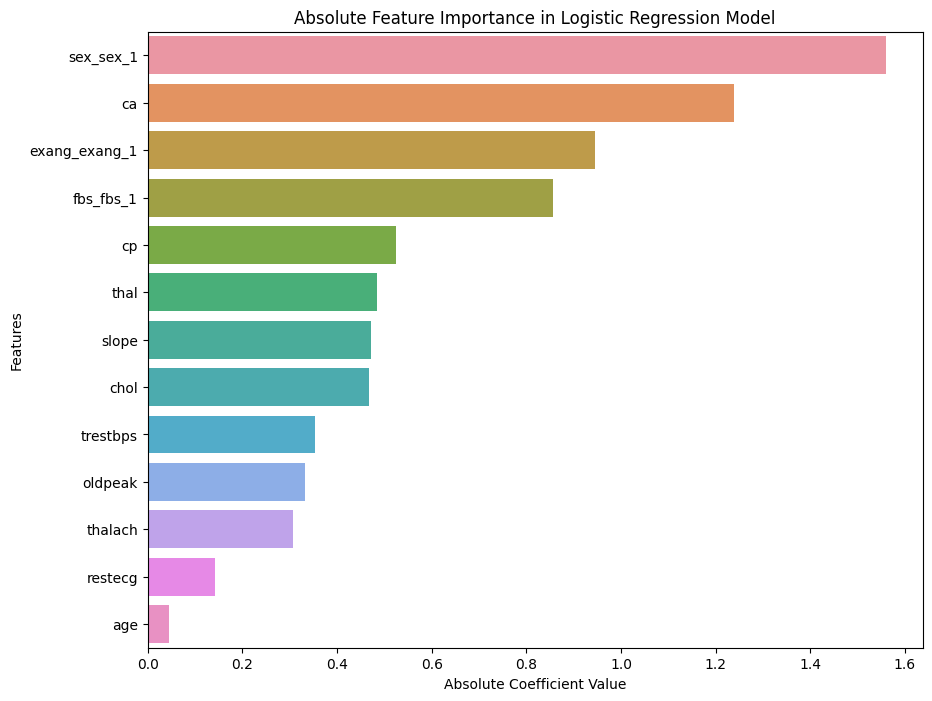

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


coef_df['abs_Coefficient'] = coef_df['Coefficient'].abs()

coef_df = coef_df.sort_values(by='abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='abs_Coefficient', y='Feature', data=coef_df)
plt.title('Absolute Feature Importance in Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8852459016393442
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision measures the proportion of true positive predictions out of all positive predictions made by the model. For class 0 (absence of heart disease), the precision is relatively high at 77%, indicating that when the model predicts the absence of heart disease, it's correct 77% of the time.
Recall (also known as sensitivity) measures the proportion of true positive predictions out of all actual positive instances in the data. For class 1 (presence of heart disease), the recall is 33%, indicating that the model only correctly identifies 33% of the actual instances of heart disease.
F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. Class 0 has the highest F1-score of 0.84, indicating better performance for predicting absence of heart disease compared to other classes.
Support indicates the number of actual occurrences of each class in the testing data.

Overall, while the model performs reasonably well in predicting the absence of heart disease (class 0), its performance for other classes, particularly for identifying the presence of heart disease, is limited. This suggests that further optimization of the model or exploration of other algorithms may be necessary to improve performance, especially for the minority classes.

## Random Forest

In [40]:
categorical_features = ['sex', 'ca', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [42]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

C:\Python 3.11\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8852459016393442


In [67]:
rfc = RandomForestClassifier(random_state=42)

In [68]:
param_grid_rfc = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [69]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv= 5)

In [70]:
CV_rfc.fit(X_train, y_train)

C:\Python 3.11\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python 3.11\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python 3.11\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python 3.11\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_met

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [72]:
best_estimator_RFC = CV_rfc.best_estimator_
best_estimator_RFC

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [73]:
y_pred_best_RFC = best_estimator_RFC.predict(X_test)

In [74]:
accuracy_best_RFC = accuracy_score(y_test, y_pred_best_RFC)
print("Accuracy:", accuracy_best_RFC)
print("Classification Report:")
print(classification_report(y_test, y_pred_best_RFC))

Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [43]:
feature_names_num = numerical_features
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out()

feature_names = feature_names_num + list(feature_names_cat)

importances = pipeline.named_steps['classifier'].feature_importances_

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

      Feature  Importance
4     oldpeak    0.094765
7      ca_0.0    0.087896
3     thalach    0.087027
14       cp_4    0.084153
0         age    0.079407
2        chol    0.066930
1    trestbps    0.062116
25   thal_3.0    0.061987
27   thal_7.0    0.058343
22    slope_1    0.039417
21    exang_1    0.037198
20    exang_0    0.031046
23    slope_2    0.030700
6       sex_1    0.022165
13       cp_3    0.021309
9      ca_2.0    0.018355
5       sex_0    0.017905
8      ca_1.0    0.016396
17  restecg_0    0.014795
19  restecg_2    0.013967
11       cp_1    0.012744
12       cp_2    0.008998
16      fbs_1    0.008561
10     ca_3.0    0.006692
24    slope_3    0.006158
15      fbs_0    0.006033
26   thal_6.0    0.004799
18  restecg_1    0.000137


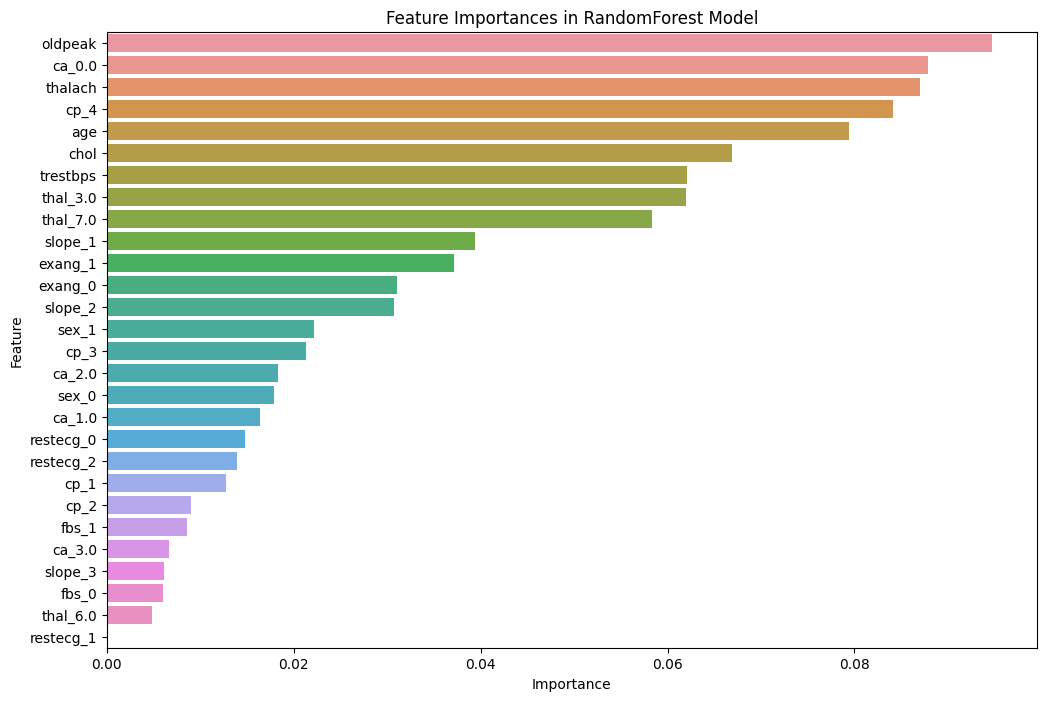

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


C:\Python 3.11\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


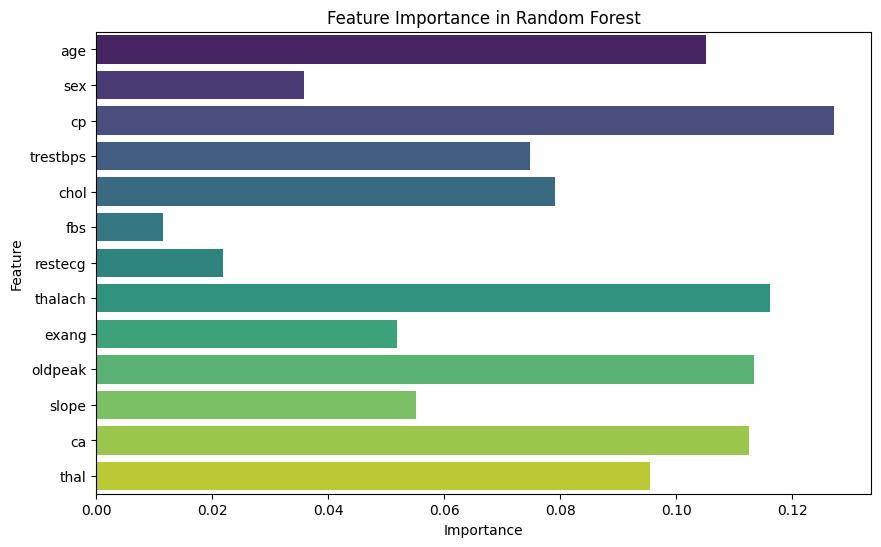

Accuracy: 0.8688524590163934


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance scores
feature_importances = rf_model.feature_importances_
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
b = important_features.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=important_features, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)




In [46]:
important_features

,Feature,Importance
0,age,0.105167
1,sex,0.035816
2,cp,0.127280
3,trestbps,0.074830
4,chol,0.079107
5,fbs,0.011468
6,restecg,0.021773
7,thalach,0.116200
8,exang,0.051821
9,oldpeak,0.113342


In [47]:
# Predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## SVC

In [48]:
from sklearn.svm import SVC

categorical_features = ['sex', 'exang', "fbs"]
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:

classifier = pipeline.named_steps['classifier']


feature_names_transformed = list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)) + numerical_features


coefficients = classifier.coef_[0]


import pandas as pd
coefficients_df = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Coefficient': coefficients
})


coefficients_df = coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)


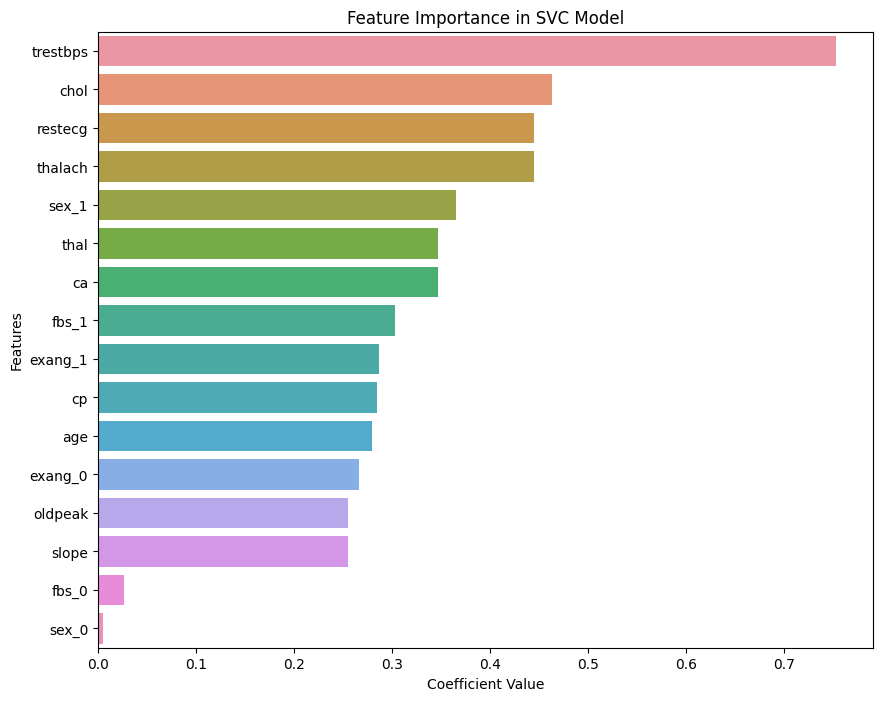

In [50]:
coefficients_df['abs_Coefficient'] = coefficients_df['Coefficient'].abs()
plt.figure(figsize=(10, 8))
sns.barplot(x='abs_Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Importance in SVC Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [51]:
from sklearn.svm import SVC

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.8852459016393442


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:

# List of the top 8 important features
important_features = ['thalach', 'oldpeak', 'chol', 'age', 'ca', 'trestbps', 'cp', 'thal']

# Select only the columns named in the list of important features
selected_df = X.loc[:, important_features]

# Display the selected DataFrame
print(selected_df)


     thalach  oldpeak  chol  age   ca  trestbps  cp  thal
0        150      2.3   233   63  0.0       145   1   6.0
1        108      1.5   286   67  3.0       160   4   3.0
2        129      2.6   229   67  2.0       120   4   7.0
3        187      3.5   250   37  0.0       130   3   3.0
4        172      1.4   204   41  0.0       130   2   3.0
..       ...      ...   ...  ...  ...       ...  ..   ...
298      132      1.2   264   45  0.0       110   1   7.0
299      141      3.4   193   68  2.0       144   4   7.0
300      115      1.2   131   57  1.0       130   4   7.0
301      174      0.0   236   57  1.0       130   2   3.0
302      173      0.0   175   38  0.0       138   3   3.0

[303 rows x 8 columns]


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_df, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8852459016393442
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)




C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

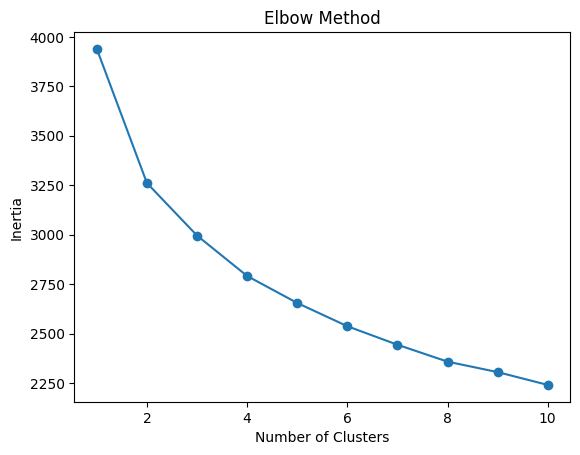

               age       sex        cp    trestbps        chol       fbs  \
cluster                                                                    
0        58.093333  0.080000  2.946667  133.080000  268.933333  0.120000   
1        48.909091  0.909091  2.752066  127.652893  228.570248  0.115702   
2        58.130841  0.841121  3.766355  135.280374  251.598131  0.205607   

          restecg     thalach     exang   oldpeak     slope        ca  \
cluster                                                                 
0        1.053333  151.253333  0.160000  0.542667  1.453333  0.373333   
1        0.694215  164.727273  0.123967  0.570248  1.347107  0.297521   
2        1.280374  131.355140  0.672897  1.918692  1.990654  1.280374   

             thal  
cluster            
0        3.106667  
1        4.396694  
2        6.224299  


C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters (example using the elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, select the optimal number of clusters
# Example: Let's assume the optimal number of clusters is 3
k_optimal = 3

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
X['cluster'] = clusters

# Analyze the characteristics of each cluster
cluster_means = X.groupby('cluster').mean()
print(cluster_means)

# Visualize the clusters using scatter plots, box plots, or other visualization techniques
# You can also use dimensionality reduction techniques like PCA or t-SNE for visualization


The elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters and identifying the "elbow" point where the rate of decrease in inertia slows down significantly. This point often indicates the optimal number of clusters, We took 3 since after 3 no big change is there.


In [57]:
from sklearn.svm import SVC

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print("SVM Accuracy:", accuracy_svm)


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.8688524590163934


In [58]:
Param_list = {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'rbf'],'gamma':[1,0.1,0.001,0.0001]}

In [59]:
SVC_model = SVC(random_state=42)

SVC_gridSearch = GridSearchCV(SVC_model,param_grid=Param_list,refit = True, verbose=2)

In [60]:
SVC_gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END .......................C=10, gamma=1, kernel=linear; total time=   1.5s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=1, kernel=linear; total time=   1.9s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.8s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.7s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.6s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   1.3s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   1.8s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.8s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.6s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.6s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   1.5s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   1.7s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.9s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.7s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.7s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   1.5s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   1.8s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.6s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.6s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.7s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ......................C=100, gamma=1, kernel=linear; total time=   9.2s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=1, kernel=linear; total time=   2.4s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=1, kernel=linear; total time=  15.4s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=1, kernel=linear; total time=   6.9s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=1, kernel=linear; total time=   2.5s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   8.7s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   2.5s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=  15.2s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   7.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   2.7s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   9.2s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   2.4s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=  16.5s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   7.5s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   3.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   8.7s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   2.4s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=  16.9s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   7.9s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   2.6s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [61]:
best_params = SVC_gridSearch.best_params_
best_params

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [62]:

best_estimator = SVC_gridSearch.best_estimator_
best_estimator

SVC(C=0.1, gamma=1, kernel='linear', random_state=42)

In [63]:
y_pred_best = best_estimator.predict(X_test)

In [64]:
accuracy_best = accuracy_score(y_test, y_pred_best)

In [65]:
print("Best SVM Accuracy:", accuracy_best)

Best SVM Accuracy: 0.8688524590163934


In [66]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy:", accuracy_best)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

